## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#number of rows in dataframe
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#number of unique users in dataset
unq_users =df.user_id.nunique()
unq_users

290584

d. The proportion of users converted.

In [5]:
#calculating the proportion of users converted
conv_users = df.query('converted == 1').converted.count()

prop_conv = conv_users/unq_users
prop_conv

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Filter instances where new page and treatment columns do not align
no_align1 = df[(df['group'] != 'treatment')& (df['landing_page'] == 'new_page')]
no_align2 = df[(df['group'] == 'treatment')& (df['landing_page'] != 'new_page')]
#print(no_align1.shape[0])
#print(no_align2.shape[0])

#Merge filtered datasets
no_align = pd.merge(no_align1,no_align2, how='outer', indicator=True)
#no_align = pd.merge(no_align1,no_align2, how='outer')

#Check to see if there are any duplicates
no_align.user_id.drop_duplicates(inplace=True)

#get number ofmisaligned entries
print('Number of times new_page & treatment dont line up:',no_align.shape[0])


Number of times new_page & treatment dont line up: 3893


f. Do any of the rows have missing values?

In [7]:
#Perform basic check to see if missing/null values exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


$$Conclusion$$
**The total number of non-null rows for each column is equal to the index range of the dataframe; hence there are no missing values**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#In order to remove the rows that do not align, we first drop the _merge column
no_align.drop(['_merge'], axis=1, inplace=True)
#print(no_align.shape[0], df.shape[0])

#Perform another outer merge between df and no_align dataframes with indicator
outer = pd.merge(df,no_align, how='outer', indicator=True)

#Check the number of rows in newly merged dataframe
outer.shape[0]


294478

In [9]:
#Performing a quick check for the outer merge to ensure all misaligned rows are captured
outer.query('_merge == "both"').user_id.count()

3893

In [10]:
#Perform filter for all rows except items found in both datasets and reset index
df2 = outer[outer['_merge'] != 'both']
df2=df2.reset_index(drop=True)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
#number of unique user ids in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#Check for duplicates
print('# duplicates: ', sum(df2.duplicated()))

# duplicates:  0


In [14]:
#Since there were no clear dupicates, we check for multiple user_id entries
dups = df2["user_id"]
df2[dups.isin(dups[dups.duplicated()])]

,user_id,timestamp,group,landing_page,converted,_merge
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,left_only
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,left_only


c. What is the row information for the repeat **user_id**? 

In [15]:
#
dup_ids = df2[dups.isin(dups[dups.duplicated()])].user_id
#repeat_row = df2.iloc[[2862], :]
#repeat_row
dup_ids

1876    773192
2862    773192
Name: user_id, dtype: int64

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
dup_ids.index[-1] #delete before submission

2862

In [17]:
#drop the last duplicate entry
#df2.drop([2862], axis=0, inplace=True)
df2.drop([dup_ids.index[-1]], axis=0, inplace=True)
df2 = df2.reset_index(drop=True)

#verify that row has been deleted
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
num_convert = df2.query('converted == 1').user_id.count()
num_convert
p_convert = num_convert/df2.user_id.count()
p_convert

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#find the probability of being converted GIVEN that the individual is in the control group
p_conv_control = df2.query('group == "control"')["converted"].mean()
p_conv_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
p_conv_treatment = df2.query('group == "treatment"')["converted"].mean()
p_conv_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
p_newpage = df2.query('landing_page == "new_page"').user_id.count()/df2.user_id.count()
p_newpage

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From our calculated propabilities, the following was gathered:**
1. P(Converted) = 0.1196
2. P(Coverted|Control) = 0.1204
3. P(Converted|Treatment) = 0.1188, and
4. P(NewPage) = 0.5001

**The conditional propbabilities however seem to suggest that conversions are more favorbale on the control page than on the treatment page. It cannot however be determined that the difference in the probabilities is statistically significant. We will require other tests that are ideal for large sample sizes**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} > 0 $$

$$ \alpha = 0.05$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

**Assumption: $p_{new} is equal to p{old}; hence the difference is equal to zero**

$$H_0: p_{new} - p_{old} = 0$$ 

**$p_{new}$ and $p_{old}$ are the converted rates for the new and old pages, respectivley.**

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2.query('landing_page=="new_page"' and 'converted ==1')["converted"].count()/df2.converted.count()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2.query('landing_page=="old_page"' and 'converted ==1')["converted"].count()/df2.converted.count()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
n_new = df2.query('landing_page == "new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [25]:
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#Simulating new page conversions via a binomial distribution

new_page_converted = np.random.binomial(1,p_new,n_new)
len(new_page_converted)
new_page_converted

array([1, 0, 0, ..., 1, 0, 0])

In [27]:
#Check statistics of simulated data to confirm it aligns 
np.mean(new_page_converted), np.std(new_page_converted)

(0.11949624939783911, 0.32437153971593835)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
#Simulating old page conversions via a binomial distribution
old_page_converted = np.random.binomial(1,p_old,n_old)
len(old_page_converted)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
#Check statistics of simulated data to confirm it aligns 
np.mean(old_page_converted), np.std(old_page_converted)

(0.12004212729049933, 0.32501079207631073)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
np.mean(new_page_converted) - np.mean(old_page_converted)

-0.0005458778926602237

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [31]:
p_diffs=[]
for _ in range(10000):
    npc_mean = np.random.binomial(1,p_new,n_new).mean()
    opc_mean = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(npc_mean - opc_mean)
    
#Confirm that we have 10000 entries
len(p_diffs)

10000

In [32]:
#Check statistics of simulated data to confirm it aligns 
np.mean(p_diffs), np.std(p_diffs)

(4.4289860103009975e-06, 0.0012024778725985021)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

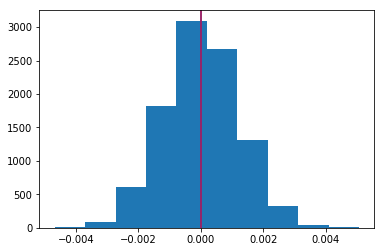

In [37]:
#caluclate observable difference
plt.hist(p_diffs);
plt.axvline(x=np.mean(p_diffs), color = 'orange'); #where the difference in success rate mean falls 
plt.axvline(x=obs_diff, color = 'purple'); #where the observable difference in success rate mean falls

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
#Verify the observable difference in ab_data.csv
obs_diff = p_new - p_old
obs_diff
#Calculate the proportion of p_diffs greater than the observable difference
pval = (p_diffs>obs_diff).mean()
pval

0.5005

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

$$Conculsion$$
**The p value calculated is 0.501. Given that we consider a TypeI error rate($\alpha$) of 0.05, we see thatthe p value is grater than $\alpha$; hence we stay with the Null Hypothesis ($H_0$)**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query(('landing_page == "old_page"') and ('converted == 1')).shape[0]
convert_new = df2.query(('landing_page == "new_page"') and ('converted == 1')).shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
 
print(convert_old, convert_new, n_old, n_new)                        
                        

34753 34753 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([convert_old, convert_new])

nobs = np.array([n_old, n_new])

z_score, pval = proportions_ztest(count, nobs, alternative='larger')
z_score,pval

(0.03744596609485696, 0.48506471135371776)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

$$Conclusion$$
**The p value (0.485) for the Z-Test is close in value to that of our Hypothesis testing, which corroborates our findings. The z score, which is 0.0374 the standard deviation also corroborates our findings.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We will adopt a Logisitic Regression model given our data either represents a conversion or no conversion.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.drop(['old_page'], axis =1, inplace =True)
df2.columns = ['user_id', 'timestamp', 'group', 'landing_page', 'converted', '_merge', 'ab_page']
df2['intercept']=1
df2.head()

,user_id,timestamp,group,landing_page,converted,_merge,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,left_only,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,left_only,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,left_only,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,left_only,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,left_only,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results=logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        18:51:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [44]:
#calculating the inverse coefficient exponent
1/np.exp(-0.0150)

1.015113064615719

**Model Summary: From our logistic regression model, we can deduce that a user in the control group is 1.0151 times likely to convert than a user in the treatment group**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

$$Conclusion$$
**From the logistic regression model, the p value is 0.190. This differs from our p value in Part II, which is for a Hypothesis testing model in which we are perfroming a one tailed test becasue of the hypothesis below:**


$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} > 0 $$

$$ \alpha = 0.05$$

**For the logistics reggession mocel, there can only be 2 outcomes "Converted or Not Converted" hence the p-value would require a two-tailed test**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

$$Conclusion$$
**Considering mulitple factors in a linear regression model (mulitple regression) will help you learn about the relationships between independent variables and dependent variables. Multiple linear regresion has many disadvantages; one disadvantage of Mulitple Regression however is Multicollinearity, where by three or more variables are highly correlated**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,_merge,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,left_only,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,left_only,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,left_only,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,left_only,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,left_only,1,1


In [46]:
### Create the necessary dummy variables
print(df_new.country.unique())
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

['UK' 'US' 'CA']


,country,timestamp,group,landing_page,converted,_merge,ab_page,intercept,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,left_only,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,left_only,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,left_only,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,left_only,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,left_only,1,1,0,1,0


In [47]:
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])
results2=logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [48]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        18:53:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [49]:
#coefficient exponents for US and CA, taking UK as the baseline
np.exp(results2.params)

intercept    0.130350
US           1.052027
CA           1.041647
dtype: float64

$$Conclusion$$
**From our model, it appears exponential coeffiecients of the US and CA countries are more likely to convert users than the UK, which is the baseline, considering this factor is compared independently.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
### Fit Your Linear Model And Obtain the Results
logit_mod3 = sm.Logit(df_new['converted'], df_new[['intercept',  'US', 'CA', 'ab_page']])
results3=logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 10 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        18:54:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
US             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

$$Conclusion$$
**From our model, it is clear that the exponential coeffiecients values are the same as when they were run independently, which suggests that the factors are not correlated; hence multicollinearity is not present in the data.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.